In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')

In [4]:
ss = pd.read_csv('SampleSuperstore.csv')
ss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [6]:
# Shape of data
ss.shape

(9994, 13)

In [7]:
# checking for duplicates
ss.duplicated().sum()

17

In [8]:
ss.drop_duplicates(inplace=True)

In [9]:
# checking unique numbers in every columns
ss.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [25]:
# Statistic of the data
ss.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [11]:
# Checking correlations
ss.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

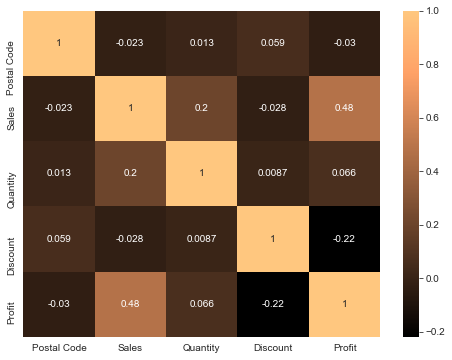

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(ss.corr(), annot=True, cmap='copper')

In [12]:
# Covariance of columns
ss.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.027732e+09,-469412.768497,935.818272,391.989291,-224679.858643
Sales,-4.694128e+05,389028.396022,278.765576,-3.645637,70057.067126
Quantity,9.358183e+02,278.765576,4.958001,0.003990,34.565743
Discount,3.919893e+02,-3.645637,0.003990,0.042624,-10.632751
Profit,-2.246799e+05,70057.067126,34.565743,-10.632751,54970.478824


Looks like from 75% to max, the difference is quite high which means there are outliers in dataset.

#### Exploratory Data Analysis

In [14]:
# Name of every column
ss.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:
# Percentage of Shiping Mode used in supermarket
ss['Ship Mode'].value_counts()*100/len(ss['Ship Mode'])

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

In [16]:
# Segment of people buying from supermarket in percentage
ss.Segment.value_counts()*100/len(ss.Segment)

Consumer       51.949484
Corporate      30.219505
Home Office    17.831011
Name: Segment, dtype: float64

Text(0.5, 1.0, 'Category sold in Percentage from Superstore')

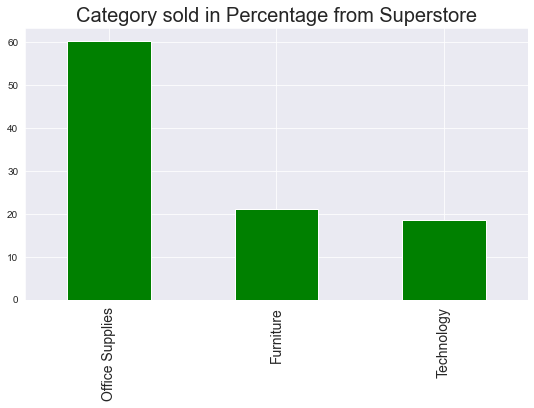

In [17]:
# Category sold in percentage
plt.figure(figsize=(9, 5))
(ss.Category.value_counts()*100/len(ss.Category)).plot(kind='bar', color='g')
plt.xticks(fontsize=14)
plt.title('Category sold in Percentage from Superstore', size=20)

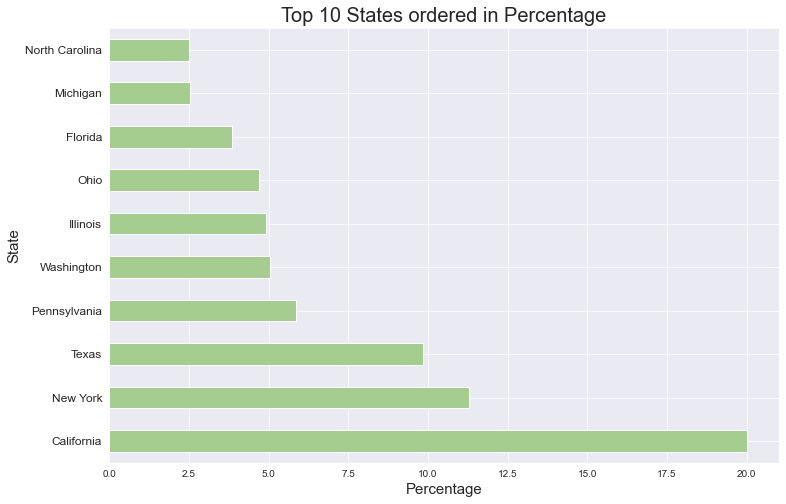

In [18]:
# Top 10 states who ordered from SuperStore
plt.figure(figsize=(12,8))
(ss.State.value_counts()*100/len(ss.State)).sort_values(ascending=False)[:10].plot(kind='barh', cmap='crest')
plt.xlabel('Percentage', size=15)
plt.yticks(fontsize=12)
plt.ylabel('State', size=15)
plt.title('Top 10 States ordered in Percentage', size=20)
plt.show()

Text(0.5, 1.0, 'Sub-Category sold in Percentage from Superstore')

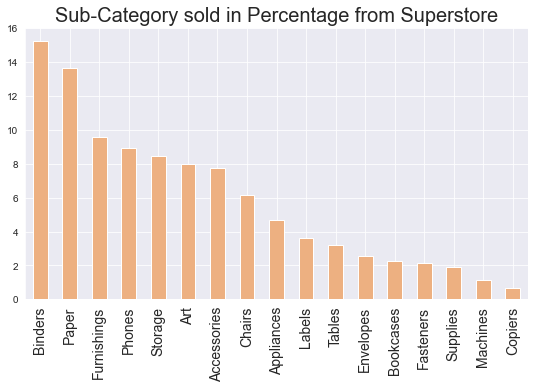

In [19]:
# Sub-Category sold in percentage
plt.figure(figsize=(9, 5))
(ss['Sub-Category'].value_counts()*100/len(ss['Sub-Category'])).plot(kind='bar', cmap='flare')
plt.xticks(fontsize=14)
plt.title('Sub-Category sold in Percentage from Superstore', size=20)

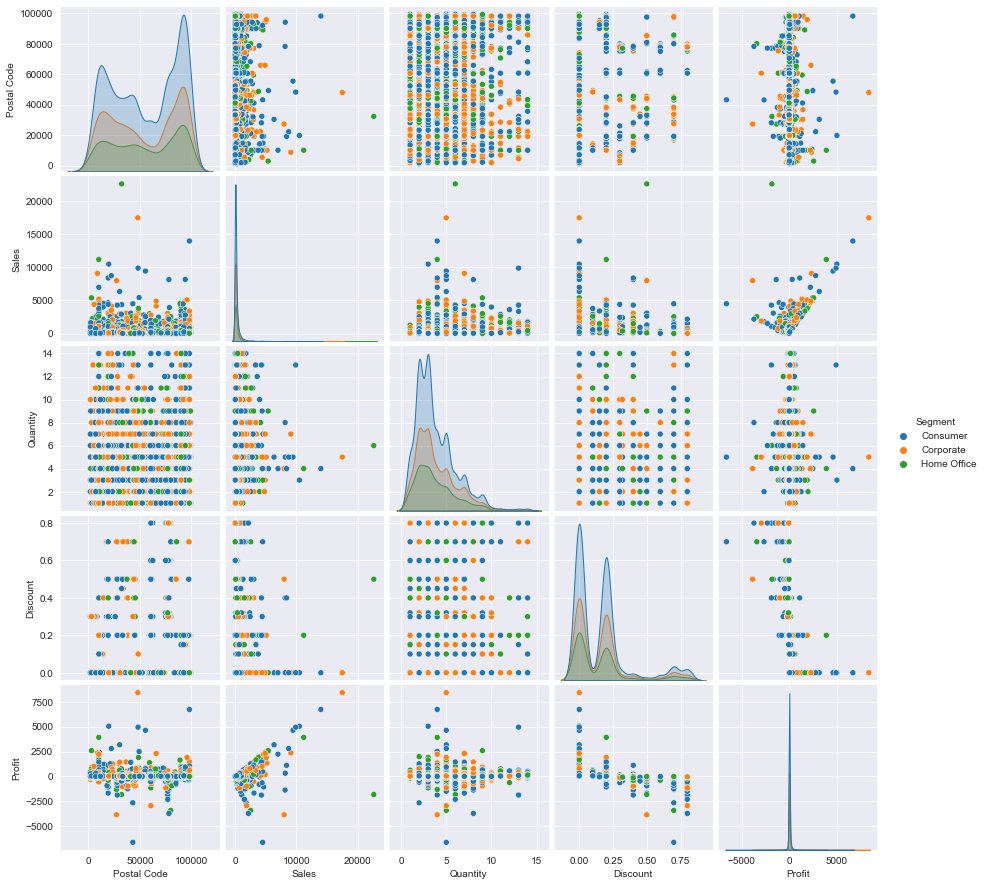

In [20]:
sns.pairplot(data=ss, hue='Segment')

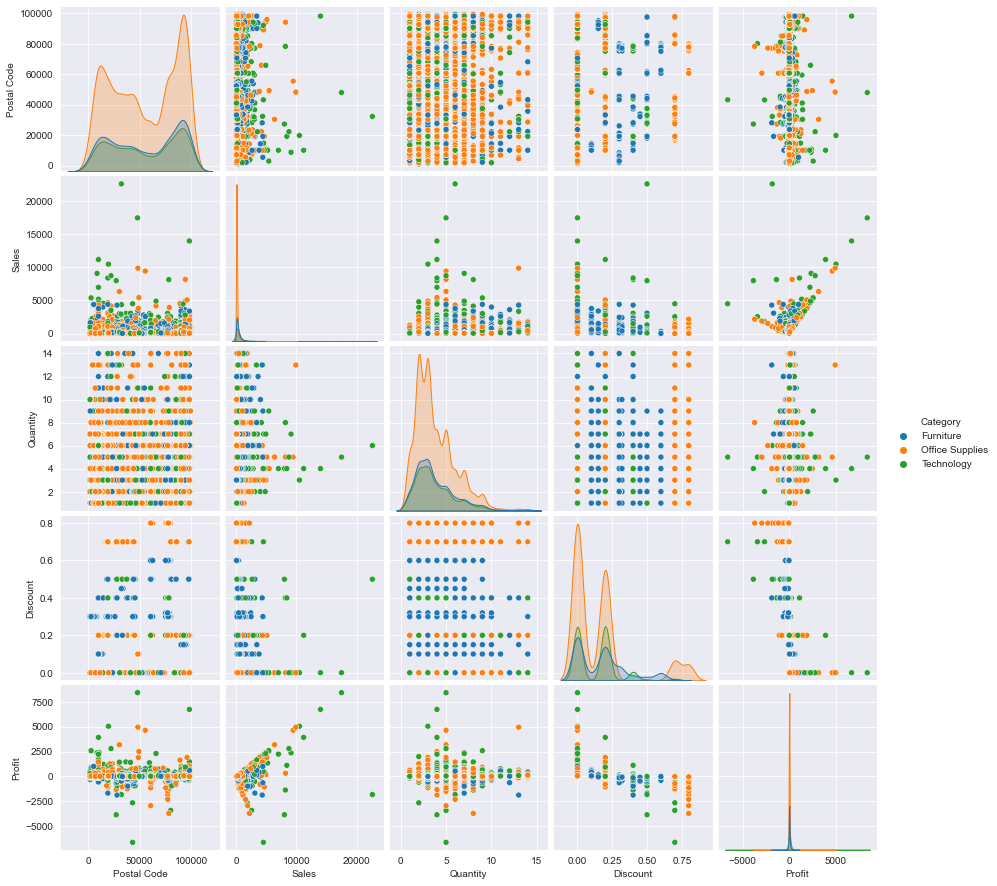

In [21]:
sns.pairplot(data=ss, hue='Category')

<AxesSubplot:xlabel='Discount'>

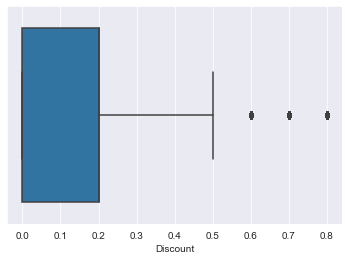

In [125]:
sns.boxplot('Discount', data=ss)

Looks like most discounts given are between 0 to 20%.

In [22]:
ss.pivot_table(values='Profit', index='Segment', columns='Discount')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,64.281062,93.630090,15.744638,22.439654,-48.018291,-102.708631,-93.462041,-216.651900,-253.572181,-38.639822,-106.962433,-115.213404
Corporate,71.717580,99.802956,49.282143,23.173335,-46.241380,-82.702010,-132.003562,-280.968633,-388.164788,-40.623326,-68.023771,-97.869076
Home Office,67.079919,97.234865,30.271889,34.783007,-37.834059,-57.226350,-119.900858,-175.146900,-377.121333,-60.039948,-115.479956,-62.509202


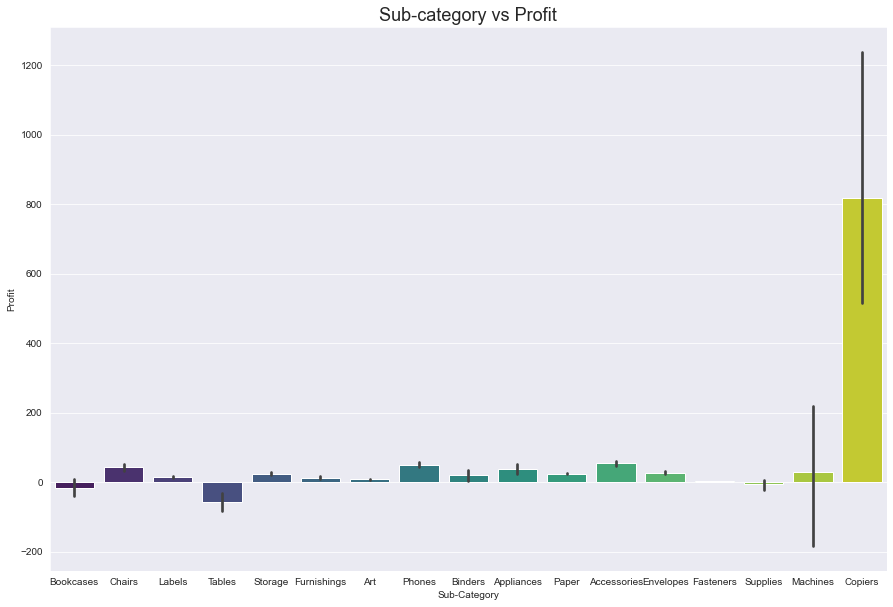

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x='Sub-Category', y='Profit', data=ss, palette='viridis')
plt.title('Sub-category vs Profit', size=18)
plt.show()

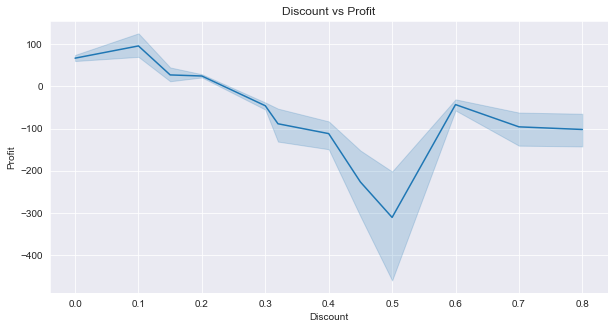

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Discount', y='Profit', data=ss)
plt.title('Discount vs Profit')
plt.show()

#### It's looks like that Superstore is in loss if they gave discounts more than 20%.

In [46]:
ss.groupby(['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'State', 'Region'])['Quantity', 'Discount',
       'Profit'].sum().reset_index()

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,88.7250
...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,63.2645


In [31]:
ss.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [144]:
group_1 =ss.groupby(['Category', 'Sub-Category'])['Sales', 'Quantity', 'Discount', 'Profit'].sum()
group_1

Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Furniture       Bookcases     114879.9963       868     48.14  -3472.5560
                Chairs        327777.7610      2351    104.70  26567.1278
                Furnishings    91683.0240      3560    132.40  13052.7230
                Tables        206965.5320      1241     83.35 -17725.4811
Office Supplies Appliances    107532.1610      1729     77.60  18138.0054
                Art            27107.0320      2996     59.60   6524.6118
                Binders       203409.1690      5971    566.20  30228.0003
                Envelopes      16476.4020       906     20.40   6964.1767
                Fasteners       3024.2800       914     17.80    949.5182
                Labels         12444.9120      1396     25.00   5526.3820
                Paper          78224.1420      5144    101.80  33944.2395
                Storage       223843.6080      3158     63.20  21278.8264
                Supplies       46673.5380       647     14.60  -1189.0995
Technology      Accessories   167380.3180      2976     60.80  41936.6357
                Copiers       149528.0300       234     11.00  55617.8249
                Machines      189238.6310       440     35.20   3384.7569
                Phones        330007.0540      3289    137.40  44515.7306

<AxesSubplot:xlabel='Category,Sub-Category'>

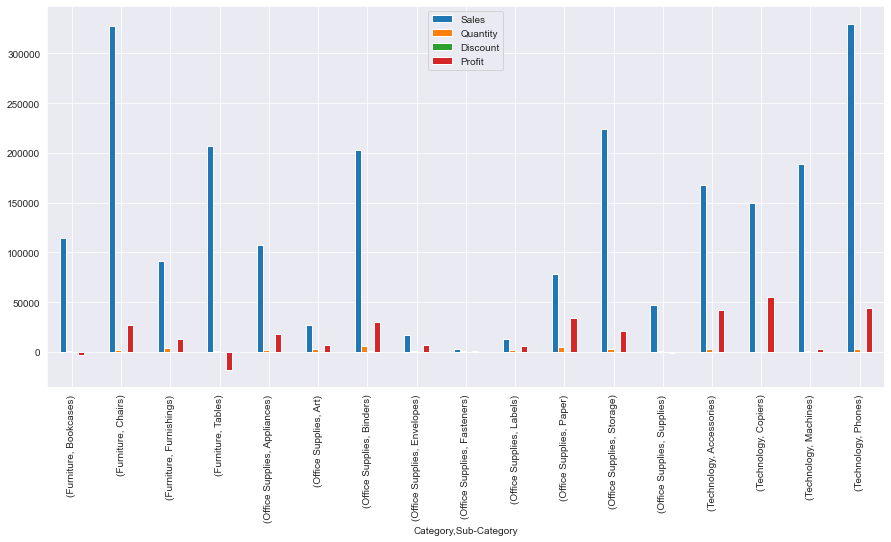

In [145]:
group_1.plot(figsize=(15,7), kind='bar')

Looks like from the above table, Superstore is having loss in 3 Sub-Categories(Tables, Bookcases and Supplies) which is mostly the Furniture Category. The most profitable Category is Technology and Chairs and Phones are most sold items.

In [147]:
group_2 =ss.groupby(['Segment', 'Category'])['Sales', 'Quantity', 'Discount', 'Profit'].sum()
group_2

Sales  Quantity  Discount      Profit
Segment     Category                                                    
Consumer    Furniture        390659.3420      4163    196.71   6955.9813
            Office Supplies  363773.5360     11737    496.00  56253.6504
            Technology       406399.8970      3597    127.80  70797.8096
Corporate   Furniture        229019.7858      2495    112.45   7584.8158
            Office Supplies  230600.2260      7001    291.30  40203.1660
            Technology       246450.1190      2095     73.10  44166.9980
Home Office Furniture        121627.1855      1362     59.43   3881.0166
            Office Supplies  124361.4820      4123    158.90  25907.8444
            Technology       183304.0170      1247     43.50  30490.1405

<AxesSubplot:xlabel='Segment,Category'>

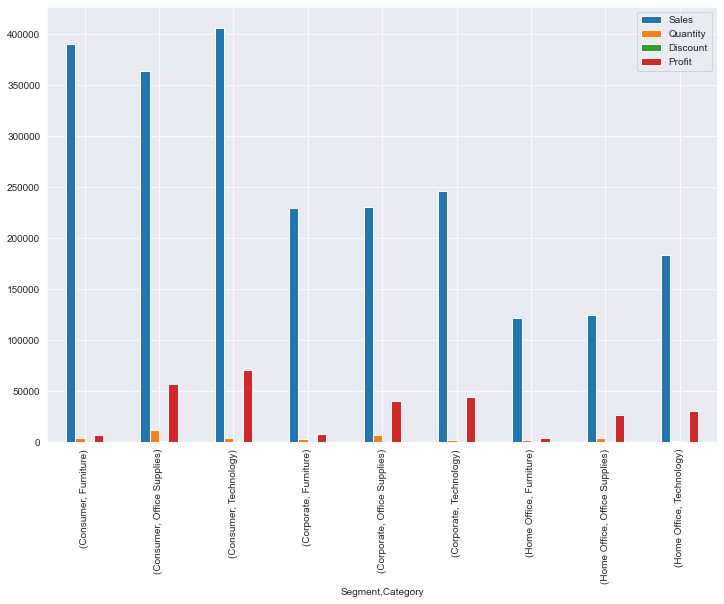

In [148]:
group_2.plot(figsize=(12,8), kind='bar')

In [149]:
# sum, count, mean, meadian, min, max (Sales of each states)
group_3 = ss.groupby('State').Sales.agg(['sum', 'count', 'mean', 'median', 'min', 'max'])
group_3.sort_values('count', ascending=False)

,sum,count,mean,median,min,max
State,,,,,,
California,457576.2715,1996,229.246629,61.156,0.990,8187.650
New York,310827.1510,1127,275.800489,60.120,1.240,11199.968
Texas,170124.5418,983,173.066675,36.288,0.444,8159.952
Pennsylvania,116496.3620,586,198.799253,41.528,0.852,8399.976
Washington,138560.8100,502,276.017550,67.710,1.344,13999.960
Illinois,80162.5370,491,163.263823,36.784,0.836,2799.960
Ohio,77976.7640,468,166.617017,43.716,1.448,4499.985
Florida,89473.7080,383,233.612815,41.472,1.167,22638.480
Michigan,75879.6440,254,298.738756,85.255,2.200,9892.740


In [150]:
group_4 =ss.groupby(['Sub-Category', 'State'])['Sales', 'Quantity', 'Discount', 'Profit'].sum()
group_4.sort_values(by=['Profit', 'Sales'], ascending=False)

,,Sales,Quantity,Discount,Profit
Sub-Category,State,,,,
Machines,New York,43183.500,73,0.0,17320.0762
Phones,New York,47502.620,393,0.0,13399.1892
Binders,New York,32456.912,696,35.8,11096.0260
Accessories,California,37255.010,568,0.0,11095.6565
Binders,Michigan,22821.970,192,0.0,11079.5050
...,...,...,...,...,...
Machines,North Carolina,12620.655,11,2.0,-5384.8086
Appliances,Texas,2407.814,159,37.6,-6147.2225
Binders,Illinois,4534.982,324,63.2,-7198.0872


Looks like Machines are most profitable things sold to New York State.

In [151]:
# sum, count, mean, meadian, min, max (Profit of each states)
group_5 = ss.groupby('State').Profit.agg(['sum', 'count', 'mean', 'median', 'min', 'max'])
group_5.sort_values('sum', ascending=False)

,sum,count,mean,median,min,max
State,,,,,,
California,76330.7891,1996,38.241878,13.33380,-325.5720,1906.4850
New York,74015.4622,1127,65.674767,13.79640,-553.6476,3919.9888
Washington,33368.2375,502,66.470593,13.48950,-73.0548,6719.9808
Michigan,24428.0903,254,96.173584,24.01680,0.0000,4946.3700
Virginia,18597.9504,224,83.026564,19.18125,0.0000,2799.9840
Indiana,18382.9363,149,123.375411,18.76700,0.0000,8399.9760
Georgia,16250.0433,184,88.315453,22.24690,0.1134,3177.4750
Kentucky,11199.6966,139,80.573357,21.77280,0.0000,1416.8000
Minnesota,10823.1874,89,121.608847,16.80000,0.0000,4630.4755


Looks like product shipped from Superstore to states such as "Oregon, Florida, Arizona, Tennessee, Colorado, North Carolina, Illinois, Pennsylvania, Ohio, Texas" are the one with losses.

In [152]:
group_6 =ss.groupby(['Sub-Category'])['Sales', 'Quantity', 'Discount', 'Profit'].sum()
group_6.sort_values(by=['Profit', 'Sales'], ascending=False)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Copiers,149528.0300,234,11.00,55617.8249
Phones,330007.0540,3289,137.40,44515.7306
Accessories,167380.3180,2976,60.80,41936.6357
Paper,78224.1420,5144,101.80,33944.2395
Binders,203409.1690,5971,566.20,30228.0003
Chairs,327777.7610,2351,104.70,26567.1278
Storage,223843.6080,3158,63.20,21278.8264
Appliances,107532.1610,1729,77.60,18138.0054
Furnishings,91683.0240,3560,132.40,13052.7230


Copiers are the most profitable things sold from Superstore